In [1]:
import sys
import importlib as imp
if ('Jupytils' in sys.modules):
    reloaded = imp.reload(Jupytils)
else:
    import Jupytils
    

## Logistic regression

### References

* http://www.win-vector.com/blog/2011/09/the-simpler-derivation-of-logistic-regression/

**Logistic regression ** is used for classification problems. The term *regression* here seems to indicate otherwise. However here, the model predicts a number between 0 and 1 and a threshhold is used to compare the result to predict one or other depending upon if it is greater or lesser than the threshhold. A threshold $T$ (usually 0.5) which indicates if it the predicted number is less than threshhold $T$ then we predict one otherwise other class.

Here we are restricting for two classes - however, later we show how it can be extended to show multiple classes.

In Linear regression we had the hypothesis function $h = \theta^T x$
<br/>In Logistic regression, the form of the hypothesis takes the form:

$h(x) = g(\theta^T x)$ where $g(\theta^T x) = \frac{1}{1+e^{-z}}$ and $z = \theta^T x$ 

The function $g$ is called Logistic function or Sigmoid function. 
Both Logistic or Sigmoid can be used interchangeably.
<br>In summary, the complete hypothesis function is:
$$h_\theta(x) = g(\theta^T x) = \frac{1}{1+e^{-\theta^{T} x}}$$. Sigmoid function looks like:
<img src="imgs/sigmoid.png",width=200,height=200>

when $z$ is +ve the term $e^{-z} < 1$, therefore, $\frac{1}{1+e^{-z}}$ is $\frac{1}{<2} > .5$; and when $z$ is -ve the denominator is $>2$ and thus $g$ will be $<.5$

$\begin{equation}
  g=\left\{
  \begin{array}{@{}ll@{}}
    \frac{1}{1+e^0} = 0.5, & \text{if}\ z=0 \\
    > .5 ,                 & \text{z < 1} \\
    < 0.5,                 & \text{z > 1} 
  \end{array}\right.
\end{equation} 
$

In Linear regressions we had the cost function $$Cost = J(\theta) = \frac{1}{2m}\sum_{1}^{m}(h_{\theta}(x) - y)^2$$
We need to modify this because $(h_\theta(x)-y)^2$ is non-convex function.

Therefore, we want a convex function so that we can gradient decent converge to global minimum.

We define the cost function for single training example:

$\begin{equation}
  Cost(h_\theta(x),y)=\left\{
  \begin{array}{@{}ll@{}}
    -\log(h_\theta(x)),    & \text{if  } y = 1 \\
    -\log(1- h_\theta(x)) & \text{if  } y = 0
  \end{array}\right.
\end{equation} 
$

We can combine the cost function and write it succintly as:
$$[-y_i \log(h_\theta (x)) - ( 1- y_i) \log(1-h_\theta (x))]$$
Notice this is same as above, when $y_i = 0$, first term cancels; and when $y_i=1$, second term goes to zero

The cost function for the entire training set is:
$$J(\theta) = \frac{1}{m} \sum_{i=1}^{m} [-y_i \log(h_\theta (x)) - ( 1- y_i) \log(1-h_\theta (x))]$$



Intuitively Sigmoid function $h_\theta(x)$ outputs a value between $0$ and $1$.

if $y$ is 1, we want $h(x)$ to be close to $1$ such that cost $\log(1) = 0$. (If not $h(x) = 0 =>$ $cost = log(0) = \infty$.

if $y$ is 0, we want $h(x)$ to be close to $0$. If it is $1$, the $cost$ is super high close to $\infty$;

If we plot the cost function  this is what we see as below.


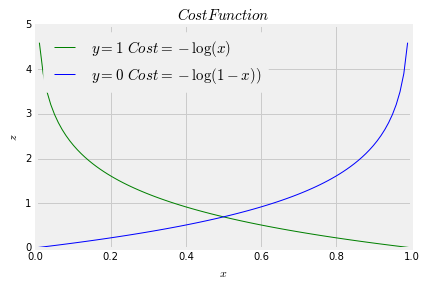

In [2]:
title= r'$Cost Function $'
graphFunction('-np.log(x)'  , 0,1, "g", "$x$", "$z$", title, '', "$y = 1\\  Cost = -\\log(x)$") 
graphFunction('-np.log(1-x)', 0,1, "b", "$x$", "$z$", title, '', "$y = 0 \\ Cost = -\\log(1-x))$")
#plt.axis((-3,3,0,1))
#graphFunction('1/(1+np.exp(-x))', -4,4, "g", "$x$", "$z$", "",'.',"Sigmoid f $z=\\frac{1}{1+e^{-\\theta^{T} x}}$") 


Now all that reamins to be done is to find $\theta$ to minimize $J(\theta)$

As you can see $J(\theta)$ i

We now have: 
$$J(\theta)=-\frac{1}{m}\sum_{i=1}^{m}y^{i}\log(h_\theta(x^{i}))+(1-y^{i})\log(1-h_\theta(x^{i}))$$
where $h_{\theta}(x)$ is defined as follows
$$h_{\theta}(x)=g(\theta^{T}x)$$
$$g(z)=\frac{1}{1+e^{-z}}$$
be $$ \frac{\partial}{\partial\theta_{j}}J(\theta) =\sum_{i=1}^{m}(h_\theta(x^{i})-y^i)x_j^i$$

$$J(\theta)=-\frac{1}{m}\sum_{i=1}^{m}y^{i}\log(h_\theta(x^{i}))+(1-y^{i})\log(1-h_\theta(x^{i}))$$
$$\theta x^i:=\theta_0+\theta_1 x^i_1+\dots+\theta_p x^i_p. $$
Then

$$\log h_\theta(x^i)=\log\frac{1}{1+e^{-\theta x^i} }=-\log ( 1+e^{-\theta x^i} ),$$ $$\log(1- h_\theta(x^i))=\log(1-\frac{1}{1+e^{-\theta x^i} })=\log (e^{-\theta x^i} )-
\log ( 1+e^{-\theta x^i} )=-\theta x^i-\log ( 1+e^{-\theta x^i} ),$$ 
[ this used: $ 1 = \frac{(1+e^{-\theta x^i})}{(1+e^{-\theta x^i})},$ the 1's in numerator cancel, then we used: $ \log(x/y) = \log(x) - \log(y) $  ]</p>

Since our original cost function is the form of:

$$J(\theta)=-\frac{1}{m}\sum_{i=1}^{m}y^{i}\log(h_\theta(x^{i}))+(1-y^{i})\log(1-h_\theta(x^{i}))$$

Plugging in the two simplified expressions above, we obtain
$$J(\theta)=-\frac{1}{m}\sum_{i=1}^m \left[-y^i(\log ( 1+e^{-\theta x^i})) + (1-y^i)(-\theta x^i-\log ( 1+e^{-\theta x^i} ))\right]$$, which can be simplified to:
$$J(\theta)=-\frac{1}{m}\sum_{i=1}^m \left[y_i\theta x^i-\theta x^i-\log(1+e^{-\theta x^i})\right]=-\frac{1}{m}\sum_{i=1}^m \left[y_i\theta x^i-\log(1+e^{\theta x^i})\right],~~(*)$$

where the second equality follows from

$$-\theta x^i-\log(1+e^{-\theta x^i})=
-\left[ \log e^{\theta x^i}+
\log(1+e^{-\theta x^i} )
\right]=-\log(1+e^{\theta x^i}). $$ [ we used $ \log(x) + \log(y) = log(x y) $ ]

All you need now is to compute the partial derivatives of $(*)$ w.r.t. $\theta_j$. 
As
$$\frac{\partial}{\partial\theta_{j}}J(\theta)  
 = \frac{\partial}{\partial\theta_{j}} \big(-\frac{1}{m}\sum_{i=1}^m \left[y_i\theta x^i-\log(1+e^{\theta x^i})\right] \big)
$$


$$\frac{\partial}{\partial \theta_j}y_i\theta x^i=y_ix^i_j, $$
$$\frac{\partial}{\partial \theta_j}\log(1+e^{\theta x^i})=\frac{x^i_je^{\theta x^i}}{1+e^{\theta x^i}}=x^i_jh_\theta(x^i), $$

Thus,
$$\frac{\partial}{\partial\theta_{j}}J(\theta) =\sum_{i=1}^{m}(h_\theta(x^{i})-y^i)x_j^i $$
$$\blacksquare$$

